*Código elaborado por Claudiomar para fins didáticos e educacionais em 29/09/2025*


# 🛳️ Estatística Descritiva — Titanic (pós slide 48)

## A historinha do Titanic
Em **10 de abril de 1912**, o transatlântico **RMS Titanic** partiu de **Southampton** (Inglaterra) rumo a **Nova York**, com escalas em **Cherbourg** (França) e **Queenstown** (Irlanda). Considerado "inafundável" para a época, o navio colidiu com um **iceberg** na noite de **14 de abril de 1912**, afundando nas primeiras horas de **15 de abril**.  
Dos mais de **2.200** passageiros e tripulantes, **cerca de 1.500** perderam a vida. A tragédia expôs questões de **segurança**, **número insuficiente de botes** e também **desigualdades de classe** no acesso ao resgate.

Nesta prática, vamos analisar uma versão didática do conjunto de dados de passageiros (do `seaborn`) para explorar **medidas de estatística descritiva** e entender padrões básicos.



## 📊 Sobre o dataset Titanic (seaborn)

Cada **linha** representa um passageiro. As colunas principais são:

- **survived** → sobreviveu (0 = não, 1 = sim)  
- **pclass** → classe do ticket (1ª, 2ª, 3ª)  
- **sex** → sexo do passageiro  
- **age** → idade  
- **sibsp** → nº de **irmãos/cônjuges** a bordo  
- **parch** → nº de **pais/filhos** a bordo  
- **fare** → **tarifa** paga pelo ticket  
- **embarked** → **porto** de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)  
- **class** → classe em texto (First, Second, Third)  
- **who** → tipo de pessoa (man, woman, child)  
- **adult_male** → adulto do sexo masculino (True/False)  
- **deck** → convés (A, B, C, …)  
- **embark_town** → cidade do embarque (Cherbourg, Queenstown, Southampton)  
- **alive** → vivo (yes/no)  
- **alone** → viaja sozinho (True/False)

> No código abaixo, vamos **traduzir** os nomes das colunas para **português** e trabalhar com elas.


In [1]:

import numpy as np  # operações numéricas
import pandas as pd  # manipulação de tabelas (DataFrame)
import matplotlib.pyplot as plt  # gráficos básicos
import seaborn as sns  # para carregar o dataset Titanic facilmente

df = sns.load_dataset("titanic").copy()  # carrega a base Titanic do seaborn e cria uma cópia

df = df.rename(columns={  # renomeia colunas para português
    "survived": "sobreviveu",  # 0 = não, 1 = sim
    "pclass": "classe_ticket",  # 1ª, 2ª, 3ª classe
    "sex": "sexo",  # sexo do passageiro
    "age": "idade",  # idade em anos
    "sibsp": "irmaos_conjuges",  # nº irmãos/cônjuges
    "parch": "pais_filhos",  # nº pais/filhos
    "fare": "tarifa",  # valor do ticket em libras esterlinas
    "embarked": "porto_embarque",  # C, Q, S
    "class": "classe_texto",  # First, Second, Third
    "who": "tipo_pessoa",  # man, woman, child
    "adult_male": "adulto_masculino",  # True/False
    "deck": "conves",  # convés A, B, C...
    "embark_town": "cidade_embarque",  # nome da cidade
    "alive": "vivo",  # yes/no
    "alone": "sozinho"  # True/False
})  # fim da renomeação

df.head()  # visualiza as primeiras linhas (Jupyter exibe automaticamente)


,sobreviveu,classe_ticket,sexo,idade,irmaos_conjuges,pais_filhos,tarifa,porto_embarque,classe_texto,tipo_pessoa,adulto_masculino,conves,cidade_embarque,vivo,sozinho
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.info() #vamos dar uma olhada na planilha. Entender melhor nossos dados. Saber quem é numérico, quem é categórico, quem é float, quem pode ter NAN...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sobreviveu        891 non-null    int64   
 1   classe_ticket     891 non-null    int64   
 2   sexo              891 non-null    object  
 3   idade             714 non-null    float64 
 4   irmaos_conjuges   891 non-null    int64   
 5   pais_filhos       891 non-null    int64   
 6   tarifa            891 non-null    float64 
 7   porto_embarque    889 non-null    object  
 8   classe_texto      891 non-null    category
 9   tipo_pessoa       891 non-null    object  
 10  adulto_masculino  891 non-null    bool    
 11  conves            203 non-null    category
 12  cidade_embarque   889 non-null    object  
 13  vivo              891 non-null    object  
 14  sozinho           891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.

# Comentários

Convés tem muito null, acho que podemos tirar.

Idade  tem alguns nulls, mas acho que dá para deixar, vai ser importante. Se fosse para fazer um machine learning ou algo assim, eu limparia a tabela e deixaria só com 714 linhas, mas como é estatística descritiva e vamos por porcentagens, acho que vale a pena deixar.

In [3]:
# remove colunas que não serão usadas na análise
df = df.drop(columns=[
    "irmaos_conjuges",     # acho muito confuso esse dados
    "pais_filhos",         # esse aqui também
    "classe_texto",        # classe como texto (já temos classe_ticket)
    "adulto_masculino",    # redundante (já temos sexo + idade)
    "conves", # muitos valores ausentes
    "porto_embarque",#redundante, já temos cidade_embarque e está por extenso
    "sexo", #tipo_pessoa é mais apropriado
    "sobreviveu" #já temos o vivo
])

df.head()

,classe_ticket,idade,tarifa,tipo_pessoa,cidade_embarque,vivo,sozinho
0,3,22.0,7.2500,man,Southampton,no,False
1,1,38.0,71.2833,woman,Cherbourg,yes,False
2,3,26.0,7.9250,woman,Southampton,yes,True
3,1,35.0,53.1000,woman,Southampton,yes,False
4,3,35.0,8.0500,man,Southampton,no,True


In [4]:
#Antes, vamos arrumar nossos dados. Lembrem do Zen of Python, "Belo é melhor que feio" e "Legibilidade conta"

# ===== Padronizações solicitadas no DataFrame df =====

# 1) Coluna "idade": converter para inteiro
#    - astype("Int64") usa o tipo inteiro *nulo* do pandas (permite NaN)
df["idade"] = df["idade"].round(0).astype("Int64")  # transforma idades em inteiros mantendo NaN

# 2) Coluna "tipo_pessoa": inglês → português
#    man → homem, woman → mulher, child → criança
df["tipo_pessoa"] = df["tipo_pessoa"].map({"man": "homem", "woman": "mulher", "child": "criança"})  # traduz valores

# 3) Coluna "cidade_embarque": adicionar país entre parênteses
#    Observação histórica: Queenstown é o nome da época (hoje Cobh), na Irlanda.
mapa_cidade_pais = {
    "Cherbourg": "Cherbourg (França)",
    "Queenstown": "Queenstown (Irlanda)",
    "Southampton": "Southampton (Reino Unido)"
}
df["cidade_embarque"] = df["cidade_embarque"].map(mapa_cidade_pais)  # anexa o país ao nome da cidade

# 4) Coluna "vivo": yes/no → "sim"/"não"
df["vivo"] = df["vivo"].map({"yes": "sim", "no": "não"})  # traduz status de vida

# 5) Coluna "sozinho": True/False → "sim"/"não"
#    .map converte booleanos para texto, preservando valores ausentes se existirem
df["sozinho"] = df["sozinho"].map({True: "sim", False: "não"})  # humaniza a variável booleana

# 6) Coluna "tarifa": arredondar para 2 casas decimais
df["tarifa"] = df["tarifa"].round(2)  # mantém apenas duas casas decimais nos valores da tarifa

# 7) Visualizar as primeiras linhas após as transformações
df.head()


,classe_ticket,idade,tarifa,tipo_pessoa,cidade_embarque,vivo,sozinho
0,3,22,7.25,homem,Southampton (Reino Unido),não,não
1,1,38,71.28,mulher,Cherbourg (França),sim,não
2,3,26,7.92,mulher,Southampton (Reino Unido),sim,sim
3,1,35,53.10,mulher,Southampton (Reino Unido),sim,não
4,3,35,8.05,homem,Southampton (Reino Unido),não,sim


## 🔢 Entendendo os dados

Vamos entender melhor os nossos dados antes de entender as características de quem sobreviveu

In [5]:
df.describe() #só aqui já dá para fazermos muitas coisas

,classe_ticket,idade,tarifa
count,891.000000,714.0,891.000000
mean,2.308642,29.693277,32.204366
std,0.836071,14.524527,49.693414
min,1.000000,0.0,0.000000
25%,2.000000,20.0,7.910000
50%,3.000000,28.0,14.450000
75%,3.000000,38.0,31.000000
max,3.000000,80.0,512.330000


In [8]:
# Frequência relativa de cada categoria em "tipo_pessoa" (%), ou seja, quantos de cada categoria embarcaram
df["tipo_pessoa"].value_counts(normalize=True).round(3)
# conta valores (normalize=True → retorna proporção em vez de contagem)
# arredonda para duas casas decimais



,proportion
tipo_pessoa,
homem,0.603
mulher,0.304
criança,0.093


In [9]:
#Seguindo mesmo padrão, mas agora multiplicando por 100 para ficar melhor

print(df["cidade_embarque"].value_counts(normalize=True).round(3)*100)
print("\n")  # quebra de linha para separar saídas
print(df["classe_ticket"].value_counts(normalize=True).round(3)*100)
print("\n")
print(df["sozinho"].value_counts(normalize=True).round(3)*100)
print("\n")
print(df["vivo"].value_counts(normalize=True).round(3)*100)


cidade_embarque
Southampton (Reino Unido)    72.4
Cherbourg (França)           18.9
Queenstown (Irlanda)          8.7
Name: proportion, dtype: float64


classe_ticket
3    55.1
1    24.2
2    20.7
Name: proportion, dtype: float64


sozinho
sim    60.3
não    39.7
Name: proportion, dtype: float64


vivo
não    61.6
sim    38.4
Name: proportion, dtype: float64



## 🔢 Proporções de sobrevivência

Vamos calcular **percentuais** de quem sobreviveu **no geral** e **por classe do ticket**.


In [10]:
# ===== Percentual de sobreviventes por CLASSE DO TICKET =====

# O pd.crosstab cria uma tabela de contingência (cruzamento) entre duas variáveis:
# - A primeira (df["classe_ticket"]) vira as LINHAS da tabela (1ª, 2ª, 3ª classe).
# - A segunda (df["vivo"]) vira as COLUNAS da tabela ("sim" ou "não").
# - O parâmetro normalize="index" faz com que cada linha seja normalizada → cada linha soma 1.
#   Assim, em vez de contagens absolutas, obtemos proporções (frações).
tab_classe = pd.crosstab(df["classe_ticket"], df["vivo"], normalize="index").round(2)*100

print("=== Sobrevivência por Classe do Ticket ===")
print(tab_classe)  # exibe resultado
print("\n")  # quebra de linha para separar saídas


=== Sobrevivência por Classe do Ticket ===
vivo            não   sim
classe_ticket            
1              37.0  63.0
2              53.0  47.0
3              76.0  24.0




In [11]:
#Agora podemos fazer para todos os outros

tab_classe2 = pd.crosstab(df["tipo_pessoa"], df["vivo"], normalize="index").round(2)*100

print("=== Sobrevivência por Tipo de Pessoa ===")
print(tab_classe2)  # exibe resultado
print("\n")  # quebra de linha para separar saídas

tab_classe3 = pd.crosstab(df["cidade_embarque"], df["vivo"], normalize="index").round(2)*100

print("=== Sobrevivência por Porto de Embarque ===")
print(tab_classe3)  # exibe resultado
print("\n")  # quebra de linha para separar saídas


=== Sobrevivência por Tipo de Pessoa ===
vivo          não   sim
tipo_pessoa            
criança      41.0  59.0
homem        84.0  16.0
mulher       24.0  76.0


=== Sobrevivência por Porto de Embarque ===
vivo                        não   sim
cidade_embarque                      
Cherbourg (França)         45.0  55.0
Queenstown (Irlanda)       61.0  39.0
Southampton (Reino Unido)  66.0  34.0





## 📌 Medidas de posição (média, mediana e moda)


In [12]:
moda_idade = df["idade"].mode()  # retorna uma Series (pode ter mais de uma moda)

print("Idade que mais apareceu (moda):")
print(moda_idade)

mediana_idade = df["idade"].median()  # retorna uma Series (pode ter mais de uma moda)

print("Mediana da idade:")
print(mediana_idade)

mediana_tarifa = df["tarifa"].median()  # retorna uma Series (pode ter mais de uma moda)

print("Mediana da tarifa:")
print(mediana_tarifa)

Idade que mais apareceu (moda):
0    24
Name: idade, dtype: Int64
Mediana da idade:
28.0
Mediana da tarifa:
14.45



## 📈 Histogramas (distribuição de variáveis numéricas)

Vamos visualizar a **distribuição** de `idade` e `tarifa`. Sinta-se livre para adicionar outras colunas.


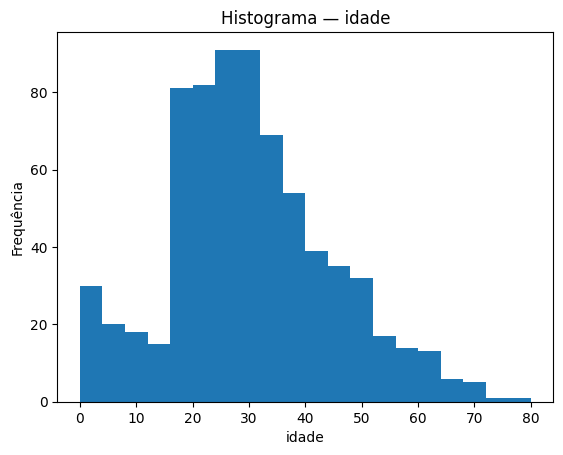

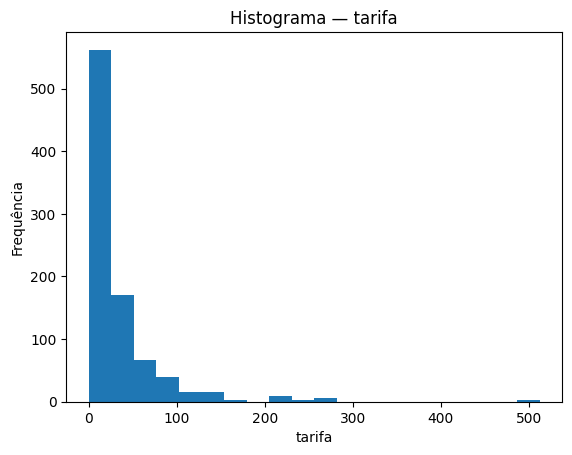

In [13]:

cols_hist = ["idade", "tarifa"]  # escolha inicial de colunas para histogramas

for col in cols_hist:  # percorre as colunas selecionadas
    plt.figure()  # abre uma figura nova
    plt.hist(df[col].dropna(), bins=20)  # desenha histograma; dropna remove valores ausentes
    plt.title(f"Histograma — {col}")  # título do gráfico
    plt.xlabel(col)  # rótulo do eixo x
    plt.ylabel("Frequência")  # rótulo do eixo y
    plt.show()  # exibe o gráfico
